In [35]:
import pytesseract
from PIL import Image
import joblib
from preprocessing.text_cleaner import TextCleaner
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [36]:
df = pd.read_csv('datasets\hakaton_data.csv')

In [37]:
df

,Unnamed: 0,Text,Label
0,0,Coalition planes massacred these children in a...,Propaganda
1,1,these PKK fellas are exceptional liars.after t...,Propaganda
2,2,This is so awesome. US airstrikes also by mist...,Propaganda
3,3,RT @ImtiyazAzhar: Support &amp; love for #Isla...,Propaganda
4,4,Ask the Americans how they liked fighting\nJTJ...,Propaganda
...,...,...,...
6342,6347,0000 the best new sciencefiction movies 2022 0...,neutral
6343,6348,vesper looks like miyazakis nausicaa appeared ...,neutral
6344,6349,prepping for the alien enemy vesper looks like...,neutral
6345,6350,2323 hermosa elección 18kissxuno los mortales ...,neutral


<Axes: xlabel='count', ylabel='Label'>

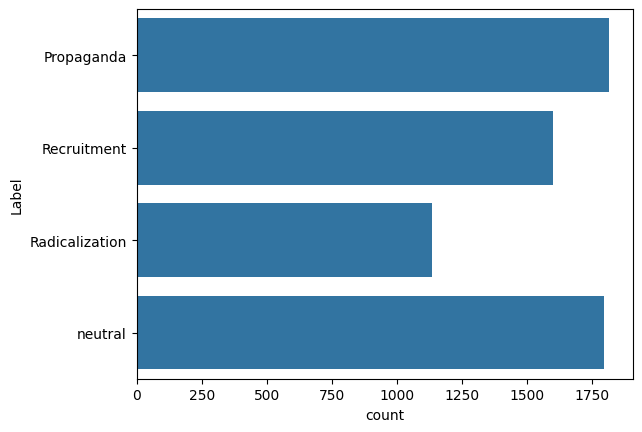

In [38]:
sns.countplot(df['Label'])

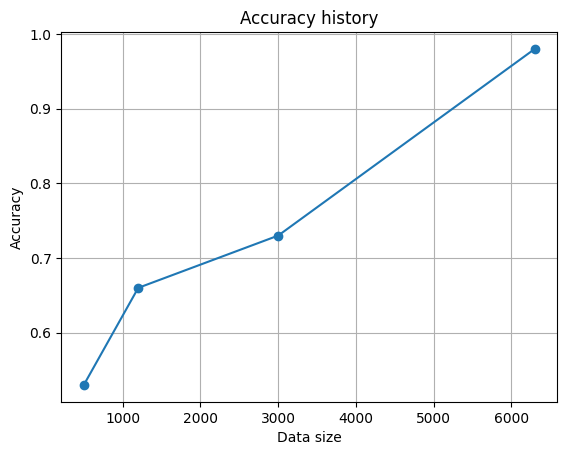

In [39]:
data_sizes = [500, 1200, 3000, 6300]
accuracies = [0.53, 0.66, 0.73, 0.98]

plt.figure()
plt.plot(data_sizes, accuracies, marker='o')
plt.xlabel("Data size")
plt.ylabel("Accuracy")
plt.title("Accuracy history")
plt.grid(True)
plt.show()

In [40]:
cleaner    = TextCleaner()
vectorizer = joblib.load("server\models\\vectorizer.pkl")

In [41]:
X = df["Text"]
y = df["Label"]

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train_clean = X_train_text.apply(cleaner.clean_text)
X_test_clean  = X_test_text.apply(cleaner.clean_text)

X_train_vec = vectorizer.transform(X_train_clean)
X_test_vec  = vectorizer.transform(X_test_clean)

In [46]:
# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 500],  
#     'max_depth': [10, 20, 30, 50],      
#     'min_samples_split': [2, 5, 10, 15],      
#     'min_samples_leaf': [1, 2, 4, 8],         
#     'max_features': ['sqrt', 'log2']  
# }

model = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     cv=10,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=2
# )

# grid_search.fit(X_train_vec, y_train)
model.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# model = grid_search.best_estimator_
# print("Лучшие параметры:", grid_search.best_params_)
# print("Точность на тесте:", grid_search.score(X_test_vec, y_test))
# print("Лучшая кросс-валидация:", grid_search.best_score_)

In [22]:
# model = joblib.load("server\models\\model.pkl")

In [48]:
y_pred = model.predict(X_test_vec)

In [49]:
report = classification_report(
    y_test,
    y_pred,
    digits=4,            
    target_names=None     
)

print("Classification Report:\n", report)

Classification Report:
                 precision    recall  f1-score   support

    Propaganda     0.9704    0.9890    0.9796       364
Radicalization     0.9913    1.0000    0.9956       227
   Recruitment     0.9968    0.9688    0.9826       320
       neutral     0.9666    0.9666    0.9666       359

      accuracy                         0.9795      1270
     macro avg     0.9812    0.9811    0.9811      1270
  weighted avg     0.9797    0.9795    0.9795      1270



Text(0.5, 1.0, 'Confusion Matrix')

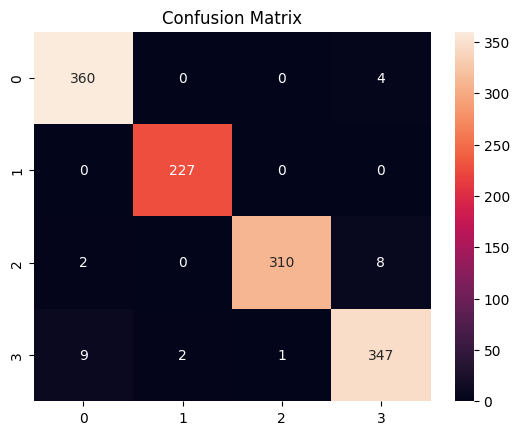

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.title("Confusion Matrix")